<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

DL is a subfield within ML that focuses on algorithms with neural networks.

<u>Using Keras and Tensorflow you'll learn how to</u>:
- create a fully-connected neural network architecture
- apply neural nets to two classic ML problems: regression and classification
- train neural nets with stochastic gradient descent, and
- improve performance with dropout, batch normalization, and other techniques

**Neural networks** = black box models (no insight to relationships)
- no interpretability but powerful predictor for complex nonlinear patterns
- used for classification and continuous predictions
- variables are in layers (some are hidden) and intercept is called bias
- inputs in first layer are transformed via some mathematical fx and propagated to the next hidden layer until it is fed to the output layer
- single neuron models (1 input) are linear models!
- NN with two inputs will fit a plane (with more inputs than that will fit a hyperplane)
- key advantage = ability to automatically create relevant features from initial inputs

DNN Structure:
- input layer
- 2 or more hidden layers
- output layer
- edges connecting neurons between adjacent layers
- activation values and bias at each neuron
 - bias measures how easy/difficult it is for a neuron to fire (higher bias = more input or activation neuron needs to fire)
- weights on each edge
 - weights define importance of inputs
 - if sum of inputs*weights exceeds the bias (threshold), the neuron fires 1 otherwise it fires 0

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

## **A single neuron**

In [ ]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.shape

(1599, 12)

The target is `'quality'` and remaining variables are inputs.

**Dense layer** = collections of linear units with a common set of inputs. 

(there are other types of layers, which we will learn later)

In [ ]:
# Create a network with 1 linear unit (units = number of outputs, input_shape = number of features)
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

Keras represent weights as tensors (TF's version of numpy array that are  compatible with GPU/TPU accelerators)

In [ ]:
w, b = model.weights

In [ ]:
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.3745501 ],
       [ 0.06192517],
       [ 0.5891747 ],
       [-0.60507095],
       [ 0.4141553 ],
       [-0.2727223 ],
       [ 0.64339393],
       [ 0.18061072],
       [-0.07313913],
       [-0.6408189 ],
       [-0.18140608]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


NOTE: there's one weight for each input (and a bias). There doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.

**Plot the output of an untrained linear model**

Run the cell below a few times to see the different lines produced with a random initialization (model's weights are set randomly before training).

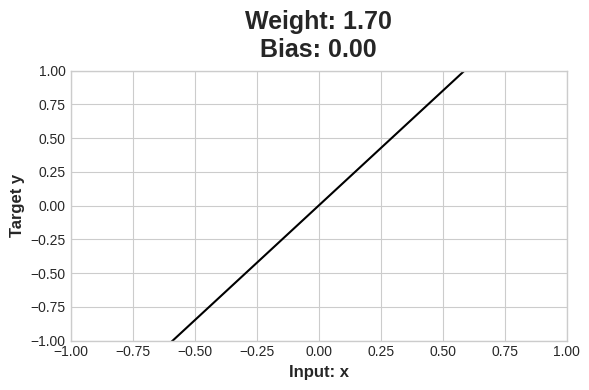

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## **Intro to DNNs**

Activation functions allow NNs to learn complex nonlinear patterns (instead of only linear relationships). In order to fit curves, apply activation functions to each of a layer's outputs (its activations). The most common is the rectifier function  `max(0,x)`.

- ReLU = rectified fx applied to linear unit
- ReLU "rectifies" negative values to 0 and creates a "bend" in the data

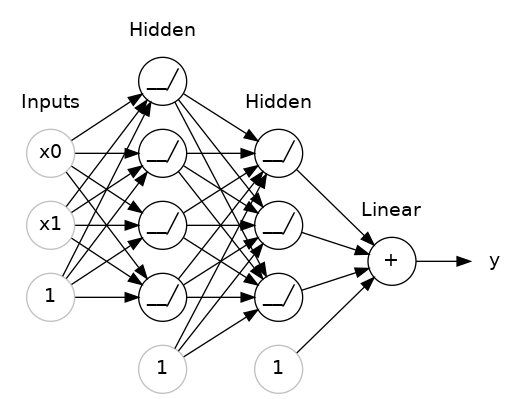

In [ ]:
# Build sequential models (image above)

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [ ]:
concrete = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML concepts/Features   Pipelines/Concrete_Data.xls')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

Create a model with **three hidden layers**, each having *512 units* and the *ReLU activation*. Be sure to include an output layer of one unit and no activation, and also `input_shape=[8]` as an argument to the first layer.

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[8]), # layer 1
    layers.Dense(units=512, activation='relu'), # layer 2
    layers.Dense(units=512, activation='relu'), # layer 3
    layers.Dense(units=1), # output layer
])

Another way to apply activation function is to define it in its own activation layer (use when you want to put some other layer between the Dense layer and its activation function).

In [ ]:
# This model is equivalent to....
model = keras.Sequential([
                          
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),

    layers.Dense(32),
    layers.Activation('relu'),

    layers.Dense(1),
])


# ...this model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[8]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

There are different activation functions that you can try to see which is the best. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. 

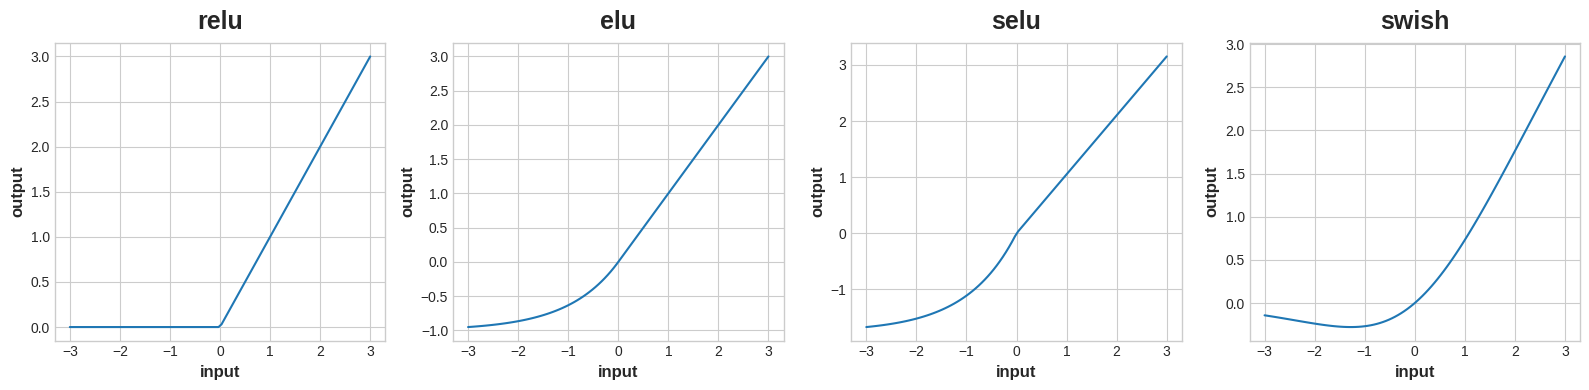

In [ ]:
# create various activation layers
relu_activation_layer = layers.Activation('relu')
elu_activation_layer = layers.Activation('elu')
selu_activation_layer = layers.Activation('selu')
swish_activation_layer = layers.Activation('swish')

# inputs
x = tf.linspace(-3.0, 3.0, 100)

fig = plt.figure(figsize=(16,4), dpi=100)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# once created, a layer is callable just like a function
ax1.plot(x, relu_activation_layer(x))
ax2.plot(x, elu_activation_layer(x))
ax3.plot(x, selu_activation_layer(x))
ax4.plot(x, swish_activation_layer(x))

ax1.set_title('relu')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax2.set_title('elu')
ax2.set_xlabel('input')
ax2.set_ylabel('output')
ax3.set_title('selu')
ax3.set_xlabel('input')
ax3.set_ylabel('output')
ax4.set_title('swish')
ax4.set_xlabel('input')
ax4.set_ylabel('output')
plt.show()

## **Stochastic Gradient Descent**

What you need to train a neural network:
- training data
- "loss function" that measures how good the network's predictions are
- "optimizer" that can tell the network how to change its weights

<u>Loss function</u>
- tells NN what problem to solve
- measures disparity between the the target's true value and model prediction
- common loss functions for regression problems are MAE, MSE, Huber Loss

<u>Optimizer</u>
- tells NN how to solve problem
- iterative algorithm that adjusts the weights to minimize the loss
- these algorithms fall under stochastic gradient descent family
- Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning ("self tuning" in a sense and great general-purpose optimizer)

<u>Training Steps</u>:
1. Sample some training data ("minibatch") and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Adjust the weights in a direction that makes the loss smaller.
 - learning rate and batch size are parameters that have greatest impact on SGD training
 - smaller learning rate means the network needs to see more minibatches before its weights converge to their best values
4. Repeat until the loss is as small as you like (or until it won't decrease any further.)

SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior. Thus, it's generally a good idea to put all of your data on a common scale for NNs.


**Epoch** = complete round of the training data<br>
**Batch** = sample of training data for each iteration

***

Back to red wine example:

In [ ]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
# We chose a three-layer network with over 1500 neurons
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [ ]:
# After defining the model, compile in the optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (`batch_size`) and to do that 10 times all the way through the dataset (`epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 70ms/step - loss: 0.2728 - val_loss: 0.1353
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1473 - val_loss: 0.1240
Epoch 3/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1264 - val_loss: 0.1147
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1155 - val_loss: 0.1099
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1128 - val_loss: 0.1073
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1071 - val_loss: 0.1036
Epoch 7/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1050 - val_loss: 0.1090
Epoch 8/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1043 - val_loss: 0.1014
Epoch 9/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1025 - val_loss: 0.1021
Epoch 10/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1008 - val_loss: 0.1066


Keras shows you the history of the training and validation loss over the epochs that is training the model but visualizing is easier.



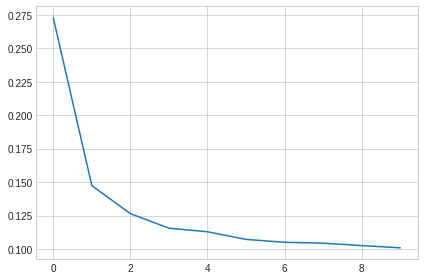

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

### Fuel Economy Example

Predict the fuel economy of an automobile given features like its type of engine or the year it was made.

In [ ]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [ ]:
fuel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/fuel.csv')
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
# Define target and inputs
X = fuel.copy()
y = X.pop('FE')

In [ ]:
# Make preprocessing pipeline
preprocessor = make_column_transformer(
    # standardize numeric cols
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    # one-hot encode categorical cols
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [ ]:
# See processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Define NN to use
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [ ]:
# Define the loss (MAE) and optimizer (Adam) using the compile method
model.compile(optimizer='adam', loss='mae')

In [ ]:
# Once you've defined the model and compiled it with a loss and optimizer --> train model
# Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 2.8096
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0130
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5384
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3335
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2232
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1219
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

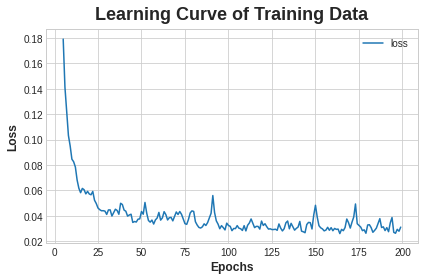

In [ ]:
# Look at the loss curves and evaluate the training
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot(title='Learning Curve of Training Data', xlabel='Epochs', ylabel='Loss');

The loss seems to have plateaued, so there would be no advantage of further training with additional epochs. Conversely, if the loss appeared to still be decreasing, then training for longer could be advantageous.

***

With the learning rate and the batch size, you have some control over:
- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

**Smaller batch sizes** = **noisier** weight updates and loss curves. 

(Smaller samples tend to give noisier estimates but can have an "averaging" effect which can be beneficial.)

**Smaller learning rates** = **smaller** weight updates/loss curves and training takes longer to converge. 

(Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely)

## **Overfitting and Underfitting**

We need to see learning curves from both training and validation data to accurately asssess model performance and choose best parameters.

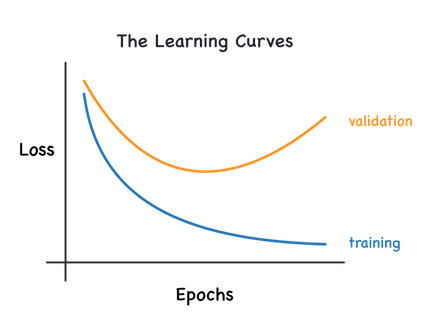

The training curve will continue decreasing regardless of the model learning signal or noise whereas the validation curve will only decrease when it learns signal. You have to find an optimal tradeoff that will give best results on unseen data.

### <u>Terminology</u>:
- **Underfitting** = training set is when the loss is not as low as it could be because the model hasn't learned enough signal
- **Overfitting** = training set is when the loss is not as low as it could be because the model learned too much noise
- **Capacity** = size and complexity of patterns a model is able to learn
 - *increase capacity* when model is *underfitting*
 - 2 ways to increase capacity = make wider and/or deeper
 - **wider** = more units to existing layers (easier to learn more linear patterns)
 - **deeper** = add more layers (easier to learn more nonlinear patterns)


In [ ]:
# Baseline model
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

# Wider model (more units)
wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

# Deeper (more layers)
deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

### Early Stopping

You can interrupt the training when the model starts learning noise and the validation loss starts to increase.

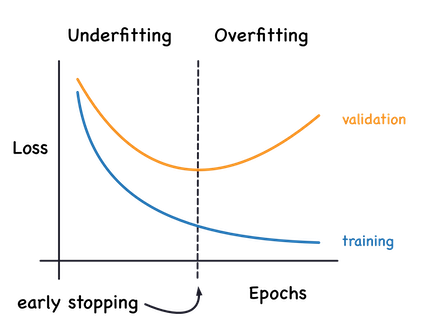

Early stopping will reset the weights back to where the min validation loss occurred. So besides preventing overfitting from training too long, early stopping can also prevent underfitting from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

In [ ]:
# Use callback function for Keras to include early stopping in training (runs after every epoch)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found. Pass this callback to the *fit* method along with the loss and optimizer.

In [ ]:
"""
Use the wine dataset and increase the capacity of the model.
Build a large network, but rely on the callback to halt the training 
once the validation loss shows signs of increasing.
"""

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Instantiate model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# Compile optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.0931360051035881


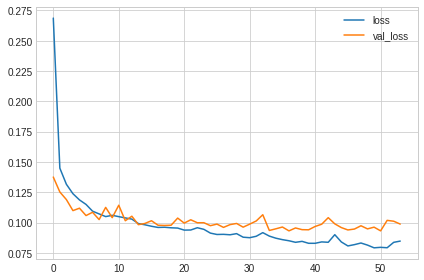

In [ ]:
# Train model with callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

# Visualize learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Keras stopped the training well before the full 500 epochs!

***

### Spotify Data Example

In [ ]:
from sklearn.model_selection import GroupShuffleSplit # group split for data partition

In [ ]:
spotify = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/spotify.csv')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


EDA

In [ ]:
spotify.shape

(32833, 23)

In [ ]:
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
spotify.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are about 0.015% missing values, which are low enough to drop.

***

Predict the popularity of a song based on various audio features, like `'tempo'`, `'danceability'`, and `'mode'`.

In [ ]:
spotify['track_artist']

0              Ed Sheeran
1                Maroon 5
2            Zara Larsson
3        The Chainsmokers
4           Lewis Capaldi
               ...       
32828        Lush & Simon
32829      Tegan and Sara
32830         Starkillers
32831              Mat Zo
32832        Julian Calor
Name: track_artist, Length: 32833, dtype: object

In [ ]:
# Define target and inputs
X = spotify.copy().dropna()
y = X.pop('track_popularity')

# Group for splitting
artists = X['track_artist']

# Numeric vars
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']

# Categorical vars 
features_cat = ['playlist_genre']

# Define preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train_idx, test_idx = next(splitter.split(X, y, groups=group))
    return (X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx])

# Partition data
X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

# Preprocess features
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# Put target on same scale as features
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

# Determine number of features for NN
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss: 0.1930


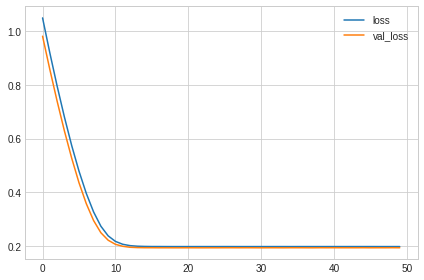

In [ ]:
# Start with simple NN (linear model, low capacity)
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])

# Compile optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)

# See learning curves and min validation loss
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

It's hard to see final part of training, so start plot with 10 epoch instead.

Minimum Validation Loss: 0.1930


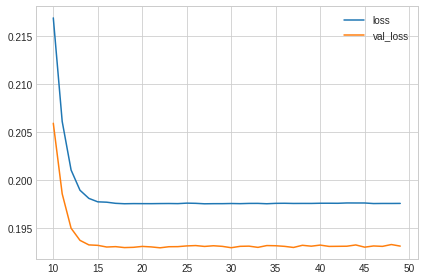

In [ ]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is *underfitting* than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Epoch 1/50
49/49 [==============================] - 1s 6ms/step - loss: 0.2637 - val_loss: 0.2057
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2048 - val_loss: 0.2000
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1990 - val_loss: 0.1960
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1958 - val_loss: 0.1944
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1934 - val_loss: 0.1953
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1914 - val_loss: 0.1949
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1904 - val_loss: 0.1929
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1890 - val_loss: 0.1934
Epoch 9/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1880 - val_loss: 0.1934
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.1929
Epoch 11/50
49/49 [

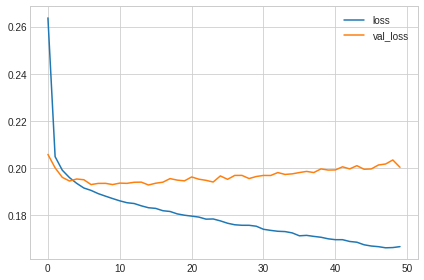

In [ ]:
# Increase model capacity by adding 3 hidden layers with 128 units each
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Now you see an increase in validation loss while the training loss continues to decrease. This shows that the NN is starting to overfit. <br>
We need to either decrease the capacity (reducing number of units) or implement early stopping.

In [ ]:
"""

Define an early stopping callback that waits 5 epochs (patience) 
for a change in validation loss of at least 0.001 (min_delta) and 
keeps the weights with the best loss (restore_best_weights)

"""

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)

Epoch 1/50
49/49 [==============================] - 1s 6ms/step - loss: 0.2375 - val_loss: 0.2060
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2035 - val_loss: 0.1985
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1977 - val_loss: 0.1962
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1942 - val_loss: 0.1965
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1920 - val_loss: 0.1942
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1901 - val_loss: 0.1944
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1889 - val_loss: 0.1943
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1877 - val_loss: 0.1940
Epoch 9/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1866 - val_loss: 0.1945
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1856 - val_loss: 0.1935
Minimum Validation 

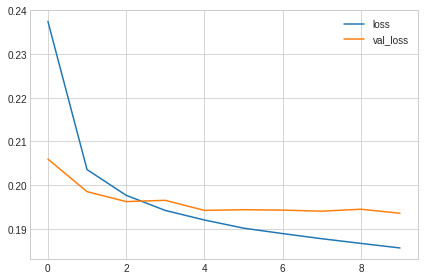

In [ ]:
# Train model with early stopping
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping] # callbacks list
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.

You can also experiment with `patience` and `min_delta` to see what difference it might make.

## **Dropout and Batch Normalization**

Special layers without neurons that can still benefit the model:
- Dropout layer
 - can help correct overfitting by randomly "dropping out" some fraction of a dense layer's input units every step of training
 - removing parts of the layer makes it harder for the model to learn spurious patterns in training data
 - forces model to learn more broad, general patterns, whose weight patterns tend to be more robust
 - can also think of this as an ensemble of layers
- Batch Normalization layer ("batchnorm")
 - can help correct slow/unstable training (tends to require fewer epochs, so helps when training gets "stuck")
 - looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters
 - added as an aid to the optimization process (though it can sometimes also help prediction performance)

In [ ]:
# Build model with dropout layer
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

Remember it's better to put all of your data on a common scale for NNs because features that tend to produce activations of very different sizes can make for unstable training behavior. You can use batchnorm at almost any point in a network.

In [ ]:
# batchnorm after layer
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

# batchnorm between layer and activation fx
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

Use dropout and batchnorm layers with Red Wine dataset (no preprocessing).

In [ ]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

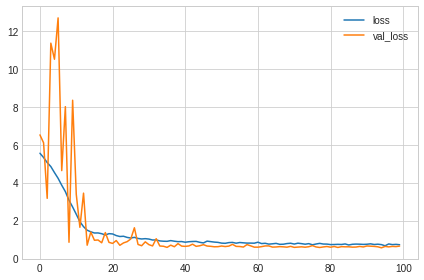

In [ ]:
# Add dropout (may need to increase number of units in dense layers) and batchnorm layers
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Compile optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You'll typically get better performance if you standardize your data before using it for training. However, we were still able to get decent results using the raw data (shows how effective batchnorm can be on more difficult datasets).

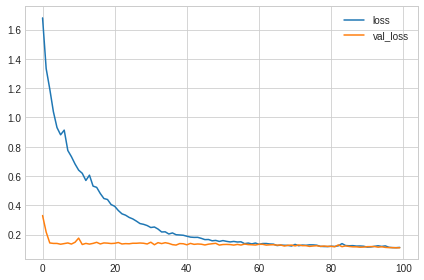

In [ ]:
# Add dropout (may need to increase number of units in dense layers) and batchnorm layers
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Compile optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

### Spotify Dataset Example

Minimum Validation Loss: 0.1948


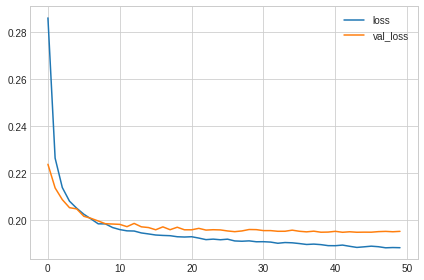

In [ ]:
# Add 2 dropout layers from previous model with rate=0.3
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae'
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0
)

# See learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

Adding the dropout layers helped prevent overfitting around epoch 5. The validation loss seemed to stabilize to a minimum while the training loss continued to decrease. Randomly dropping units in layers forced the model to find more of the true signal rather than noise.

In [ ]:
concrete = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# Make df copy
df = concrete.copy()

# Define target and inputs
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

# Partition data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

# Get number of units
input_shape = [X_train.shape[1]]

Train the network (no special layers) on the unstandardized data

Minimum Validation Loss: nan


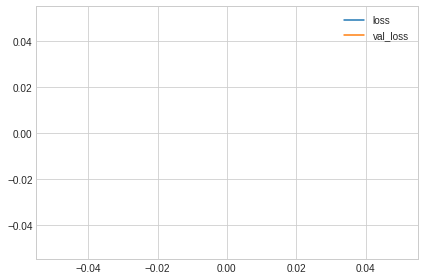

In [39]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Training a model with this dataset will usually fail (even if it converges by luck with weight initialization, it converges to a large number).

*BatchNorm* can help correct this problem.

Minimum Validation Loss: 3.9762


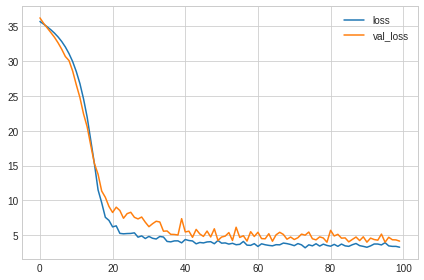

In [40]:
# Add BatchNorm before each Dense layer
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

BIG IMPROVEMENT! BatchNorm can let you train models on difficult datasets by adaptively scaling the data as it passes through the network.

***

## **Binary Classification**

So far, we've only looked at regression problems but now we'll see how NN performs on classification problems! Most everything we've learned up until now still applies. The *main difference* is in the *loss function* we use and in what kind of *outputs* we want the final layer to produce.

<u>Metrics</u>:
- cross-entropy
 - requires probabilities as inputs
- want to minimize distance between probabilities

(accuracy cannot be used as a loss fx because SGD requires a fx that changes smoothly and not in "jumps" or ratio of counts)

<u>Activation Function</u>:
- use **sigmoid activation** to convert real-valued outputs produced by a dense layer into probabilities
- use defined threshold to get final class prediction (default is 0.5 in Keras)

In [43]:
ion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/ion.csv', index_col=0)
ion

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,good
348,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,good
349,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,good
350,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,good


In [57]:
# Get df copy
df = ion.copy()
# Convert target to binary numbers
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

# Partition data
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# Find min and max values for per col
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

# Perform min-max scaling
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
# Drop NaNs
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

# Define target and inputs
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [58]:
df_train

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
7,1.0,0.987940,0.44699,0.973005,0.396000,0.964030,0.358250,0.929980,0.363290,0.898830,0.260355,0.891125,0.246180,0.873140,0.192820,0.789725,0.159570,0.689260,0.131795,0.681620,0.117190,0.659490,0.101235,0.613960,0.091830,0.568295,0.087450,0.523030,0.088025,0.478690,0.09341,0.430840,0.095125,0.0
53,1.0,1.000000,1.00000,1.000000,1.000000,0.955050,1.000000,0.365150,1.000000,0.084240,1.000000,0.000000,1.000000,0.000000,0.862630,0.000000,0.211105,0.000000,0.289740,0.000000,0.000000,0.235810,0.000000,0.950070,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.32657,1.000000,0.674225,0.0
115,1.0,0.956765,0.90793,0.135135,1.000000,0.302670,0.778675,0.527025,0.648650,0.407005,0.448795,0.484210,0.455150,0.507005,0.482985,0.505540,0.497315,0.501710,0.500485,0.500240,0.500375,0.499985,0.500095,0.499985,0.500010,0.499995,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,1.0
46,0.0,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.312500,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.50000,0.500000,0.500000,1.0
107,1.0,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.810975,1.000000,0.500000,0.500000,0.500000,0.500000,0.682925,0.140245,0.780490,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.554880,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.0,1.000000,0.52906,0.972625,0.537090,0.999760,0.566155,1.000000,0.490445,0.974230,0.535165,0.978565,0.573220,0.974310,0.556120,0.954480,0.600595,0.983705,0.581325,0.998475,0.571290,0.953920,0.582050,0.958335,0.612155,0.942115,0.617855,0.942840,0.612555,0.891620,0.64788,0.917870,0.655830,0.0
42,1.0,0.000000,0.00000,1.000000,1.000000,1.000000,0.428125,0.500000,0.500000,0.000000,1.000000,1.000000,1.000000,0.589585,0.000000,0.000000,0.000000,0.543750,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.500000,0.500000,1.0
15,1.0,1.000000,0.53690,1.000000,0.517100,1.000000,0.472185,1.000000,0.543820,1.000000,0.598255,1.000000,0.601640,1.000000,0.563925,1.000000,0.552805,1.000000,0.635435,1.000000,0.723790,1.000000,0.708750,1.000000,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.66246,1.000000,0.733560,0.0
156,1.0,0.862070,0.49458,0.898520,0.505420,0.900000,0.500985,0.895075,0.505420,0.892120,0.495075,0.916750,0.516255,0.925615,0.508375,0.900495,0.496060,0.895565,0.485220,0.879805,0.516750,0.873890,0.527585,0.863055,0.492610,0.890205,0.503060,0.870445,0.474875,0.914780,0.51478,0.895075,0.503940,0.0


In [60]:
# Instantiate model using "sigmoid" activation in the final layer to get class probabilities as outcomes
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

# Compile model with cross-entropy loss and accuracy metric (adam optimizer works well with classification too)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Implement early stopping to train faster for this specific example
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.2517
Best Validation Accuracy: 0.9048


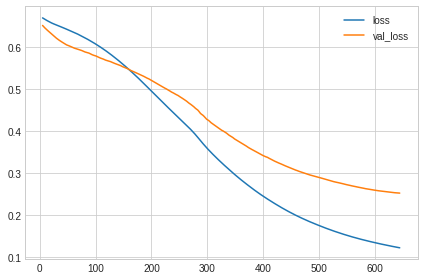

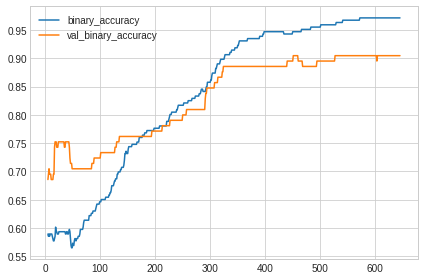

In [61]:
# See learning curves
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

### Binary Classification Example using Hotel Data

In [62]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [64]:
# Import data
hotel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/hotel.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


EDA

In [65]:
hotel.shape

(119390, 32)

In [66]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [67]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [68]:
# Define target and inputs
X = hotel.copy()
y = X.pop('is_canceled')

Data Preprocessing / Cleaning

In [72]:
# Map month name to numeric 
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

# Numeric vars
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]

# Categorical vars
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

# Make pipeline for preprocessing numeric and categorical vars
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# Stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)
# Preprocess features
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# Get number of features for NN
input_shape = [X_train.shape[1]]
print(input_shape)

[63]


Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

# Instantiate model
model = keras.Sequential([
  layers.BatchNormalization(input_shape=input_shape),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(1, activation='sigmoid')
])

# Compile model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [97]:
# Train model and see learning curves
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [98]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
175/175 [==============================] - 4s 16ms/step - loss: 0.4824 - binary_accuracy: 0.7691 - val_loss: 0.4321 - val_binary_accuracy: 0.7943
Epoch 2/200
175/175 [==============================] - 2s 14ms/step - loss: 0.4229 - binary_accuracy: 0.7999 - val_loss: 0.4015 - val_binary_accuracy: 0.8139
Epoch 3/200
175/175 [==============================] - 3s 14ms/step - loss: 0.4098 - binary_accuracy: 0.8077 - val_loss: 0.3941 - val_binary_accuracy: 0.8152
Epoch 4/200
175/175 [==============================] - 3s 15ms/step - loss: 0.4021 - binary_accuracy: 0.8123 - val_loss: 0.3903 - val_binary_accuracy: 0.8185
Epoch 5/200
175/175 [==============================] - 2s 14ms/step - loss: 0.3971 - binary_accuracy: 0.8151 - val_loss: 0.3869 - val_binary_accuracy: 0.8201
Epoch 6/200
175/175 [==============================] - 2s 14ms/step - loss: 0.3929 - binary_accuracy: 0.8184 - val_loss: 0.3827 - val_binary_accuracy: 0.8212
Epoch 7/200
175/175 [==============================]

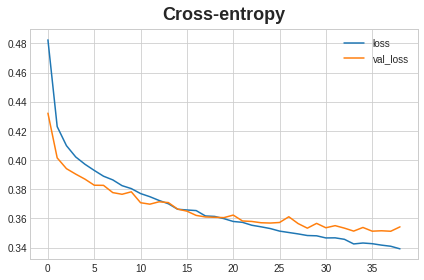

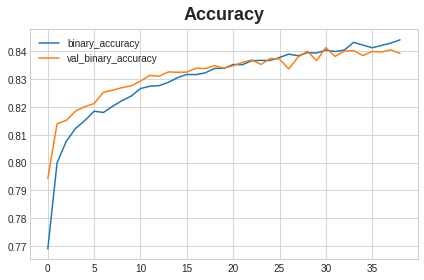

In [99]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Though we can see the training loss continuing to fall, the early stopping callback prevented any overfitting. Moreover, the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in. All in all, it looks like this training was a success!